# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Find percent of postings with skill
2. Visualize median salary vs percent skill demand

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


### Clean Data

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculate Percent of Job Postings that Have Skills in US

In [3]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


## Median Salary vs Percent Skill Demand in US

In [4]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

In [14]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


Creating a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills in US.

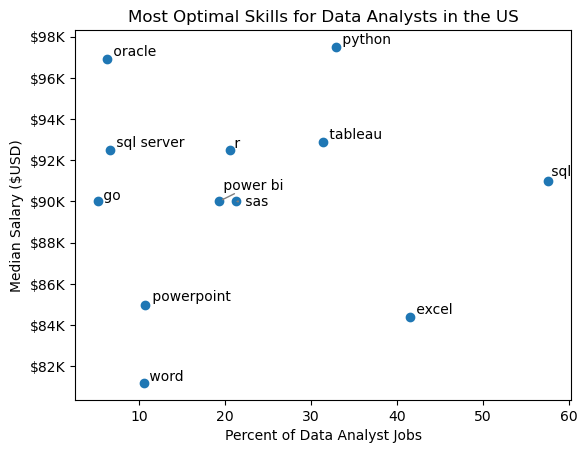

In [15]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  
plt.title('Most Optimal Skills for Data Analysts in the US')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()

### Clean Data

In [ ]:
df_DA_Ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_Ind = df_DA_Ind.dropna(subset=['salary_year_avg'])

df_DA_Ind_exploded = df_DA_Ind.explode('job_skills')

df_DA_Ind_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


## Calculate Percent of Job Postings that Have Skills in India

In [26]:
df_DA_skills_Ind = df_DA_Ind_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills_Ind = df_DA_skills_Ind.rename(columns={'count': 'skill_count_ind', 'median': 'median_salary_ind'})

DA_job_count_Ind = len(df_DA_Ind) 

df_DA_skills_Ind['skill_percent_ind'] = df_DA_skills_Ind['skill_count_ind'] / DA_job_count_Ind * 100

df_DA_skills_Ind = df_DA_skills_Ind[df_DA_skills_Ind['skill_count_ind'] > 0]

df_DA_skills_Ind

,skill_count_ind,median_salary_ind,skill_percent_ind
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


## Median Salary vs Percent Skill Demand in India

In [29]:
skill_limit_1 = 5
df_DA_skills_high_demand_Ind = df_DA_skills_Ind[df_DA_skills_Ind['skill_percent_ind'] > skill_limit_1]

Creating a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills in India.

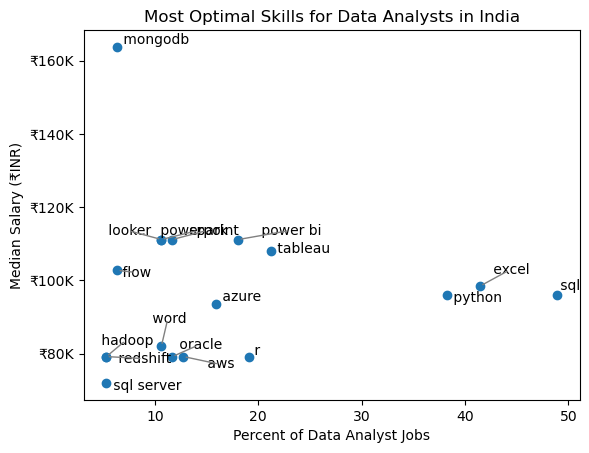

In [ ]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand_Ind['skill_percent_ind'], df_DA_skills_high_demand_Ind['median_salary_ind'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (₹INR)')  
plt.title('Most Optimal Skills for Data Analysts in India')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K')) 

texts = []
for i, txt in enumerate(df_DA_skills_high_demand_Ind.index):
    texts.append(plt.text(df_DA_skills_high_demand_Ind['skill_percent_ind'].iloc[i], df_DA_skills_high_demand_Ind['median_salary_ind'].iloc[i], " " + txt))

adjust_text(
    texts, arrowprops=dict(arrowstyle='-', color='gray'), expand_points=(1.4, 1.6),force_text=1.0)
plt.show()